In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# data cleaning
# EDA
# Text preprocessing
# model building
# evaluation
# improvement
# website
# deploy

# Data Cleaning

In [6]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
# almost all the column values in last 3 columns is null, its better to drop these 3 columns

In [8]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [11]:
# renaming columns

df.rename(columns = {'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [13]:
# let's make target column values numeric

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
df.duplicated().sum()

403

In [19]:
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

# EDA

([<matplotlib.patches.Wedge at 0x13620e03ac0>,
 [Text(-0.42519443516002475, -1.0144997251399075, 'ham'),
  Text(0.42519434017570373, 1.014499764949479, 'spam')],
 [Text(-0.23192423736001347, -0.5533634864399495, '87.37'),
  Text(0.2319241855503838, 0.5533635081542612, '12.63')])

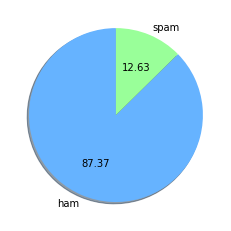

In [22]:
color = ['#66b3ff','#99ff99']
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f',shadow=True, startangle=90,colors=color)

In [23]:
# so data is slight imbalanced

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ranjit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['text'].apply(len)
# number of character in each msg

<ipython-input-26-857c02754c7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# this will create new column num_words that will contain number of words in that text msg

<ipython-input-28-b7b6787b5e8a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['sent_words'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
# this will create new column sent_words that will contain number of sentences in that text msg

<ipython-input-30-1e289190bfb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sent_words'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [31]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

<AxesSubplot:>

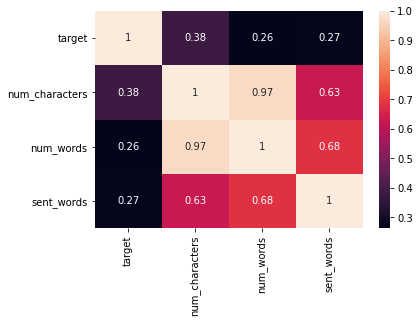

In [32]:
sns.heatmap(df.corr(),annot=True)

In [33]:
# Due to high correlation => multicolliearity we will use only one of column, 
# we will use num_characters as variation of num_character with target is larget than other two

# preprocessing


In [34]:
# lowercase
# Tokenization
# removing special characters (only alpha numeric allowed)
# removing stop words and punctuations (stop words: a,an, the, how,did,.... )  ,  punctuation(!,#,%,......)
# stemming ((loving , love, loved, lovable) = > love)

In [35]:
import nltk
from nltk.stem.porter import PorterStemmer


In [36]:
ps = PorterStemmer()

In [37]:
# from nltk.corpus import stopwords
# import string
# def TextTransform(text):
#     text = text.lower()
#     text = nltk.word_tokenize(text)
    
#     y =[]
#     for i in text:
#         if(i.isalnum()):
#             y.append(i)
    
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         if(i not in stopwords.words('english') and i not in string.punctuation):
#             y.append(i)
    
#     text = y[:]
#     y.clear()
    
#     for i in text:
#         y.append(ps.stem(i))
        
#     return " ".join(y)    # => this will return in series format 

In [155]:
# removing numeric strings as well
from nltk.corpus import stopwords
import string
def TextTransform(text):
    text = text.lower()
    text = nltk.word_tokenize(text) 
    
    y =[]
    for i in text:
        if(i.isalnum()):
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if(i not in stopwords.words('english') and i not in string.punctuation and i.isnumeric()==False):
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)    # => this will return in series format 

In [156]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [157]:
print(TextTransform('Go until jurong point, crazy!!.. %Available only in bugis n great world la e buffet... Cine there got amore wat...'))

go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [158]:
df['transformed_text'] = df['text'].apply(lambda x:TextTransform(x))

<ipython-input-158-24c10039e7dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(lambda x:TextTransform(x))


In [159]:
df.head()

,target,text,num_characters,num_words,sent_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri wkli comp win fa cup final tkt 21st...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [160]:
# pip install wordcloud

In [161]:
# wordcloud can be used to see the frequency of words in text, size of word is relative to its frequency in text

In [162]:
from wordcloud import WordCloud

In [163]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [164]:
spam_data = df[df['target']==1]['transformed_text']
spam_data.head()

ham_data = df[df['target']==0]['transformed_text']
# ham_data.head()

# type(spam_data) => pandas.core.series.Series

Text(0.5, 1.0, 'SPAM')

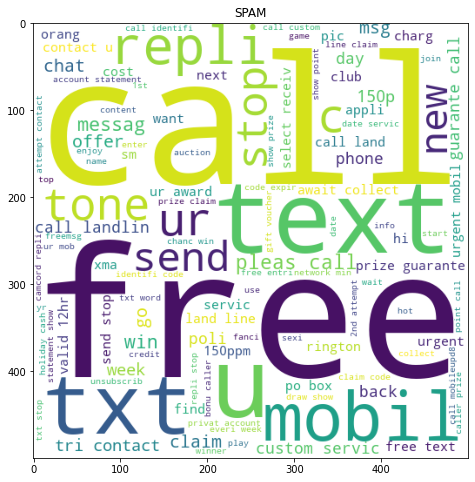

In [165]:
spam_wc = wc.generate(spam_data.str.cat(sep=" "))
plt.figure(figsize=(8,8))
plt.imshow(spam_wc)
plt.title('SPAM')

Text(0.5, 1.0, 'HAM')

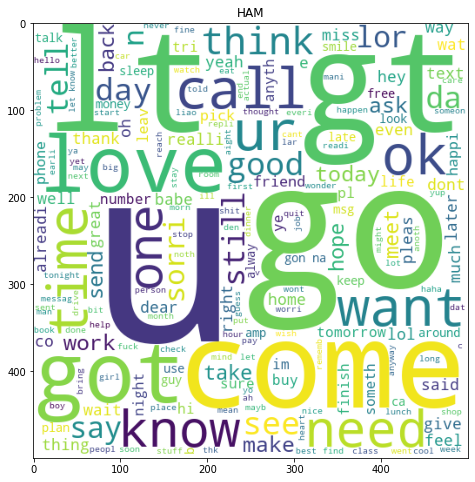

In [166]:
ham_wc = wc.generate(ham_data.str.cat(sep=" "))
plt.figure(figsize = (8,8))
plt.imshow(ham_wc)
plt.title('HAM')

In [167]:
type(df[df['target']==1]['transformed_text'])

pandas.core.series.Series

In [168]:
spam_corpus = []  # this is basically collection(list) of all the words in spam text
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [169]:
spam_corpus[0:6]

['free', 'entri', 'wkli', 'comp', 'win', 'fa']

In [170]:
# now i want to count most common 30 words in spam_corpus

In [171]:
import collections

In [172]:
from collections import Counter

In [173]:
counter = Counter(spam_corpus)
counter

Counter({'free': 191,
         'entri': 21,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'call': 320,
         'code': 27,
         'kl341': 1,
       

In [174]:
spam_df = pd.DataFrame(counter.most_common(30))
spam_df

,0,1
0,call,320
1,free,191
2,txt,141
3,text,122
4,u,119
5,ur,119
6,mobil,114
7,stop,104
8,repli,103
9,claim,98


D:\Persnol_Documents\TOOLS\temp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


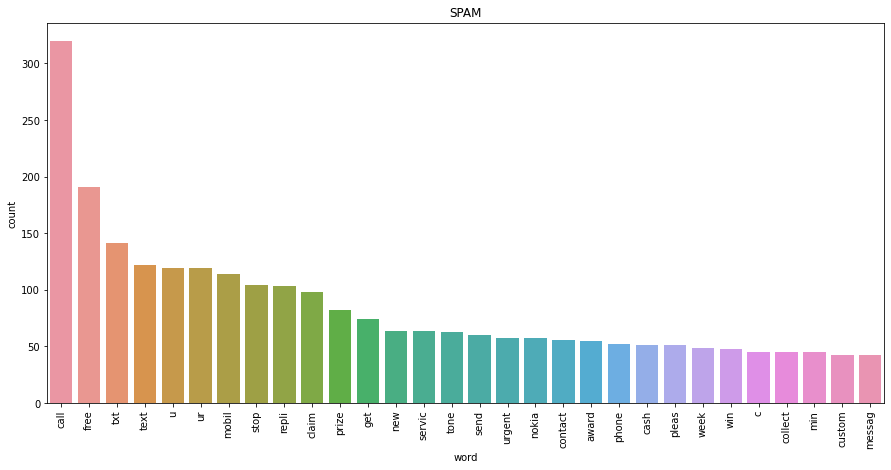

In [175]:
x=spam_df[0]
y=spam_df[1]
plt.figure(figsize = (15,7))
ax = sns.barplot(x,y)
plt.xticks(rotation=90)
ax.set(xlabel='word', ylabel='count',title='SPAM')
plt.show()


In [176]:
# now same thing with ham messages

In [177]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [178]:
len(ham_corpus)

34627

In [179]:
counter = Counter(ham_corpus)

In [180]:
ham_df = pd.DataFrame(counter.most_common(30))

In [181]:
ham_df

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,come,275
6,got,236
7,know,236
8,like,234
9,call,233


D:\Persnol_Documents\TOOLS\temp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


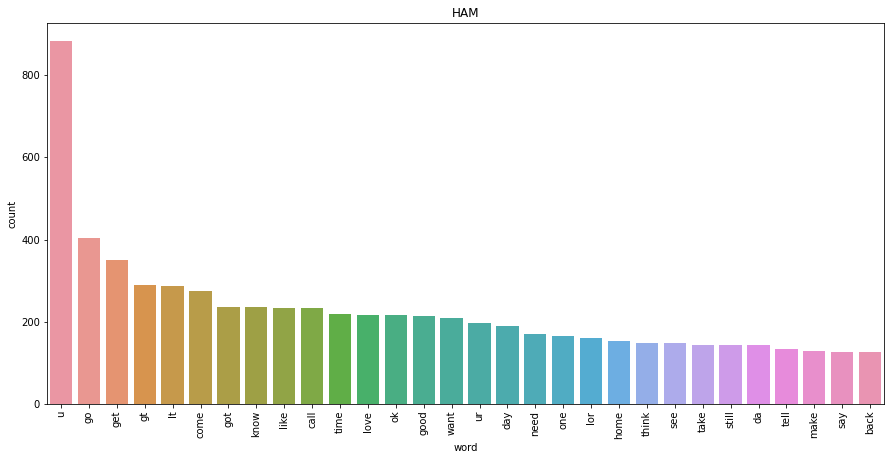

In [182]:
x=ham_df[0]
y=ham_df[1]
plt.figure(figsize = (15,7))
ax = sns.barplot(x,y)
ax.set(xlabel='word',ylabel='count',title='HAM')
plt.xticks(rotation=90) # word on x-axis appear verticle
plt.show()

In [183]:
# now i have a list of most commmon 30 spam words and most common 30 ham words

In [184]:
# model building

In [185]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [186]:
x = cv.fit_transform(df['transformed_text']).toarray()

In [187]:
x.shape
# type(x)

(5169, 6230)

In [188]:
y=df['target'].values
y.shape

(5169,)

In [189]:
type(x)

numpy.ndarray

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2) # sequence is important

In [192]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [193]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [194]:
# in this model as data is slight unstable (87% ham data  and only 13% spam data)  , accuracy_score is not much reliable score
# instead precision_score is more useful score to taken into consideration

In [195]:
# with gaussian model
gnb.fit(x_train,y_train)
y_predict1 = gnb.predict(x_test)
print(confusion_matrix(y_test,y_predict1))
print(accuracy_score(y_test,y_predict1))
print(precision_score(y_test,y_predict1))

[[790 106]
 [ 24 114]]
0.874274661508704
0.5181818181818182


In [196]:
# with multinomial model
mnb.fit(x_train,y_train)
y_predict2 = mnb.predict(x_test)
print(confusion_matrix(y_test,y_predict2))
print(accuracy_score(y_test,y_predict2))
print(precision_score(y_test,y_predict2))

[[865  31]
 [ 13 125]]
0.9574468085106383
0.8012820512820513


In [197]:
# with binomail model
bnb.fit(x_train,y_train)
y_predict3 = bnb.predict(x_test)
print(confusion_matrix(y_test,y_predict3))
print(accuracy_score(y_test,y_predict3))
print(precision_score(y_test,y_predict3))

[[890   6]
 [ 28 110]]
0.9671179883945842
0.9482758620689655


In [198]:
# lets do the same thing with TfidfVectorizer
# TfidfVectorizer is similar to CountVectorizer

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()

In [200]:
x_new = tv.fit_transform(df['transformed_text']).toarray()

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.2,random_state=2)

In [203]:
gnb_tfi = GaussianNB()
bnb_tfi = BernoulliNB()
mnb_tfi = MultinomialNB()

In [204]:
# with gaussian model of TfidfVectorizer
gnb_tfi.fit(x_train,y_train)
y_predict4 = gnb_tfi.predict(x_test)
print(confusion_matrix(y_test,y_predict4))
print(accuracy_score(y_test,y_predict4))
print(precision_score(y_test,y_predict4))

[[791 105]
 [ 30 108]]
0.8694390715667312
0.5070422535211268


In [205]:
# with multinomial model of TfidfVectorizer
mnb_tfi.fit(x_train,y_train)
y_predict5 = mnb_tfi.predict(x_test)
print(confusion_matrix(y_test,y_predict5))
print(accuracy_score(y_test,y_predict5))
print(precision_score(y_test,y_predict5))

[[896   0]
 [ 45  93]]
0.9564796905222437
1.0


In [206]:
# with binomail model of TfidfVectorizer
bnb_tfi.fit(x_train,y_train)
y_predict6 = bnb_tfi.predict(x_test)
print(confusion_matrix(y_test,y_predict6))
print(accuracy_score(y_test,y_predict6))
print(precision_score(y_test,y_predict6))

[[890   6]
 [ 28 110]]
0.9671179883945842
0.9482758620689655


In [207]:
# here multinomial model of TfidfVectorizer giving precision score 1, which is most accurate,but we have to compromize with accuracy

In [208]:
# lets try with support vector machine algorithm as it is also classification algorithm

In [209]:
from sklearn.svm import SVC
svc = SVC()
svc

SVC()

In [210]:
svc.fit(x_train,y_train)

SVC()

In [211]:
y_predict7 =svc.predict(x_test)
print(confusion_matrix(y_test,y_predict7))
print(accuracy_score(y_test,y_predict7))
print(precision_score(y_test,y_predict7))

[[894   2]
 [ 31 107]]
0.9680851063829787
0.981651376146789


In [212]:
# not much effective

In [213]:
import sklearn.ensemble

In [214]:
# let's try with few more algorithm
# Logistic Regression
# Decision Tree
# K-nearest neighbour
# RandomForest
# ExtraTreeClassifier

In [215]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [216]:
lgc = LogisticRegression()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rft = RandomForestClassifier()
etc = ExtraTreesClassifier()

In [217]:
lgc.fit(x_train,y_train)
dtc.fit(x_train,y_train)
knn.fit(x_train,y_train)
rft.fit(x_train,y_train)
etc.fit(x_train,y_train)

ExtraTreesClassifier()

In [218]:
y_predict8 = lgc.predict(x_test)

print(confusion_matrix(y_test,y_predict8))
print(accuracy_score(y_test,y_predict8))
print(precision_score(y_test,y_predict8))

[[894   2]
 [ 51  87]]
0.9487427466150871
0.9775280898876404


In [219]:
y_predict9 = dtc.predict(x_test)

print(confusion_matrix(y_test,y_predict9))
print(accuracy_score(y_test,y_predict9))
print(precision_score(y_test,y_predict9))

[[869  27]
 [ 27 111]]
0.9477756286266924
0.8043478260869565


In [220]:
y_predict10 = knn.predict(x_test)

print(confusion_matrix(y_test,y_predict10))
print(accuracy_score(y_test,y_predict10))
print(precision_score(y_test,y_predict10))

[[896   0]
 [ 97  41]]
0.9061895551257253
1.0


In [221]:
y_predict11 = rft.predict(x_test)

print(confusion_matrix(y_test,y_predict11))
print(accuracy_score(y_test,y_predict11))
print(precision_score(y_test,y_predict11))

[[896   0]
 [ 26 112]]
0.9748549323017408
1.0


In [222]:
y_predict12 = etc.predict(x_test)

print(confusion_matrix(y_test,y_predict12))
print(accuracy_score(y_test,y_predict12))
print(precision_score(y_test,y_predict12))

[[894   2]
 [ 20 118]]
0.9787234042553191
0.9833333333333333


In [223]:
# random forest tree looks more accurate, but wrt precision_score() multinomial model of TfidfVectorizer is still best

In [224]:
# so we will try now with combining these algorithms

In [225]:
# 1) voting classifier

In [226]:
from sklearn.ensemble import VotingClassifier

In [227]:
vtcf = VotingClassifier(estimators=[('mul',mnb_tfi),('rft',rft)],voting='soft')

In [228]:
vtcf.fit(x_train,y_train)

VotingClassifier(estimators=[('mul', MultinomialNB()),
                             ('rft', RandomForestClassifier())],
                 voting='soft')

In [229]:
y_predict13= vtcf.predict(x_test)

In [230]:
print(confusion_matrix(y_test,y_predict13))
print(accuracy_score(y_test,y_predict13))
print(precision_score(y_test,y_predict13))

[[896   0]
 [ 35 103]]
0.9661508704061895
1.0


In [231]:
# lets try stacking as well which is similar to voting but priorities are given to perticular algorithm

In [232]:
from sklearn.ensemble import StackingClassifier

In [233]:
estimetor = [('mul',mnb_tfi),('rft',rft),('etc',etc)]
final_estimetor = RandomForestClassifier()

In [234]:
st = StackingClassifier(estimetor,final_estimetor)

In [235]:
st.fit(x_train,y_train)

StackingClassifier(estimators=[('mul', MultinomialNB()),
                               ('rft', RandomForestClassifier()),
                               ('etc', ExtraTreesClassifier())],
                   final_estimator=RandomForestClassifier())

In [236]:
y_predict14 = st.predict(x_test)

In [237]:
print(confusion_matrix(y_test,y_predict14))
print(accuracy_score(y_test,y_predict14))
print(precision_score(y_test,y_predict14))

[[884  12]
 [ 16 122]]
0.9729206963249516
0.9104477611940298


In [238]:
# so this is not giving better output, 
# so far  rft is the best algorithm, we will use that for prediction

In [140]:
# model = rft

In [141]:
df[df['target']==1]['text']

2       Free entry in 2 a wkly comp to win FA Cup fina...
5       FreeMsg Hey there darling it's been 3 week's n...
8       WINNER!! As a valued network customer you have...
9       Had your mobile 11 months or more? U R entitle...
11      SIX chances to win CASH! From 100 to 20,000 po...
                              ...                        
5537    Want explicit SEX in 30 secs? Ring 02073162414...
5540    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547    Had your contract mobile 11 Mnths? Latest Moto...
5566    REMINDER FROM O2: To get 2.50 pounds free call...
5567    This is the 2nd time we have tried 2 contact u...
Name: text, Length: 653, dtype: object

In [142]:
# test_x ="Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
# test_x = "Ranjit, you're almost there! You have unlocked the Silver coin. Woohoo! Now, collect the Gold coin by inviting just 2 more friends and win early access to 4,000+ part-time internships in easy to do profiles before others.Participate now by clicking here or on the button below."
# test_x = "Full Stack Data Science Bootcamp 2.0 Job Guarantee Program Save my Spot Limited seats available Contact us +91 95383 03385, +91 6260 726 925  91 87885 03778, +91 98800 55539 +91 86600 34247 contact@ineuron.ai, sudhanshu@ineuron.a"
# test_x = "You are qualified for idfc lifetimefree creditcards. verify your details and enjoy interestfree cash withdrawals"
# test_x = "Hey], we came across a package from august pending for you. Kindly claim ownership and confirm for delivery here: [link]."
# test_x = "Dear [Name], Bank of America is closing your bank account. Please confirm your PIN at [link] to keep your account activated."
# test_x = "REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode";
test_x = "This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
test_x = TextTransform(test_x)
xx = tv.transform([test_x])

test_y = mnb_tfi.predict(xx)

In [143]:
if test_y[0]==1:
    print('spam')
else:
    print('not a spam')

spam


In [144]:
import pickle

In [145]:
pickle.dump(rft,open('model.pkl','wb'))

In [146]:
pickle.dump(tv,open('RandomForestClassifier.pkl','wb'))